In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv(r'C:\Users\ayush\Downloads\train.csv\train.csv')
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [4]:
df = df.sample(frac=0.5)

In [5]:
songs = pd.read_csv(r'C:\Users\ayush\Downloads\songs.csv\songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

members = pd.read_csv(r'C:\Users\ayush\Downloads\members.csv\members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 506.6+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,3688709.0,5.029806e-01,0.499991,0.0,0.0,1.0,1.0,1.0
song_length,3688644.0,2.450982e+05,67391.899502,1950.0,214726.0,241811.0,272160.0,10851706.0
language,3688622.0,1.861622e+01,21.178509,-1.0,3.0,3.0,52.0,59.0
city,3688709.0,7.508380e+00,6.641173,1.0,1.0,5.0,13.0,22.0
bd,3688709.0,1.754301e+01,21.634610,-43.0,0.0,21.0,29.0,1051.0
registered_via,3688709.0,6.794396e+00,2.275449,3.0,4.0,7.0,9.0,13.0
registration_init_time,3688709.0,2.012812e+07,30176.425723,20040326.0,20110705.0,20131023.0,20151022.0,20170131.0
expiration_date,3688709.0,2.017157e+07,3877.591958,19700101.0,20170911.0,20170926.0,20171006.0,20201017.0


In [8]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlGnBu',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27515,1589118,0.430806
gender,object,2,1480607,0.401389
composer,object,59545,837762,0.227115
source_screen_name,object,20,207157,0.056160
genre_ids,object,520,59166,0.016040
source_system_tab,object,8,12480,0.003383
source_type,object,12,10794,0.002926
language,float64,10,87,0.000024
song_length,float64,49714,65,0.000018
artist_name,object,32293,65,0.000018


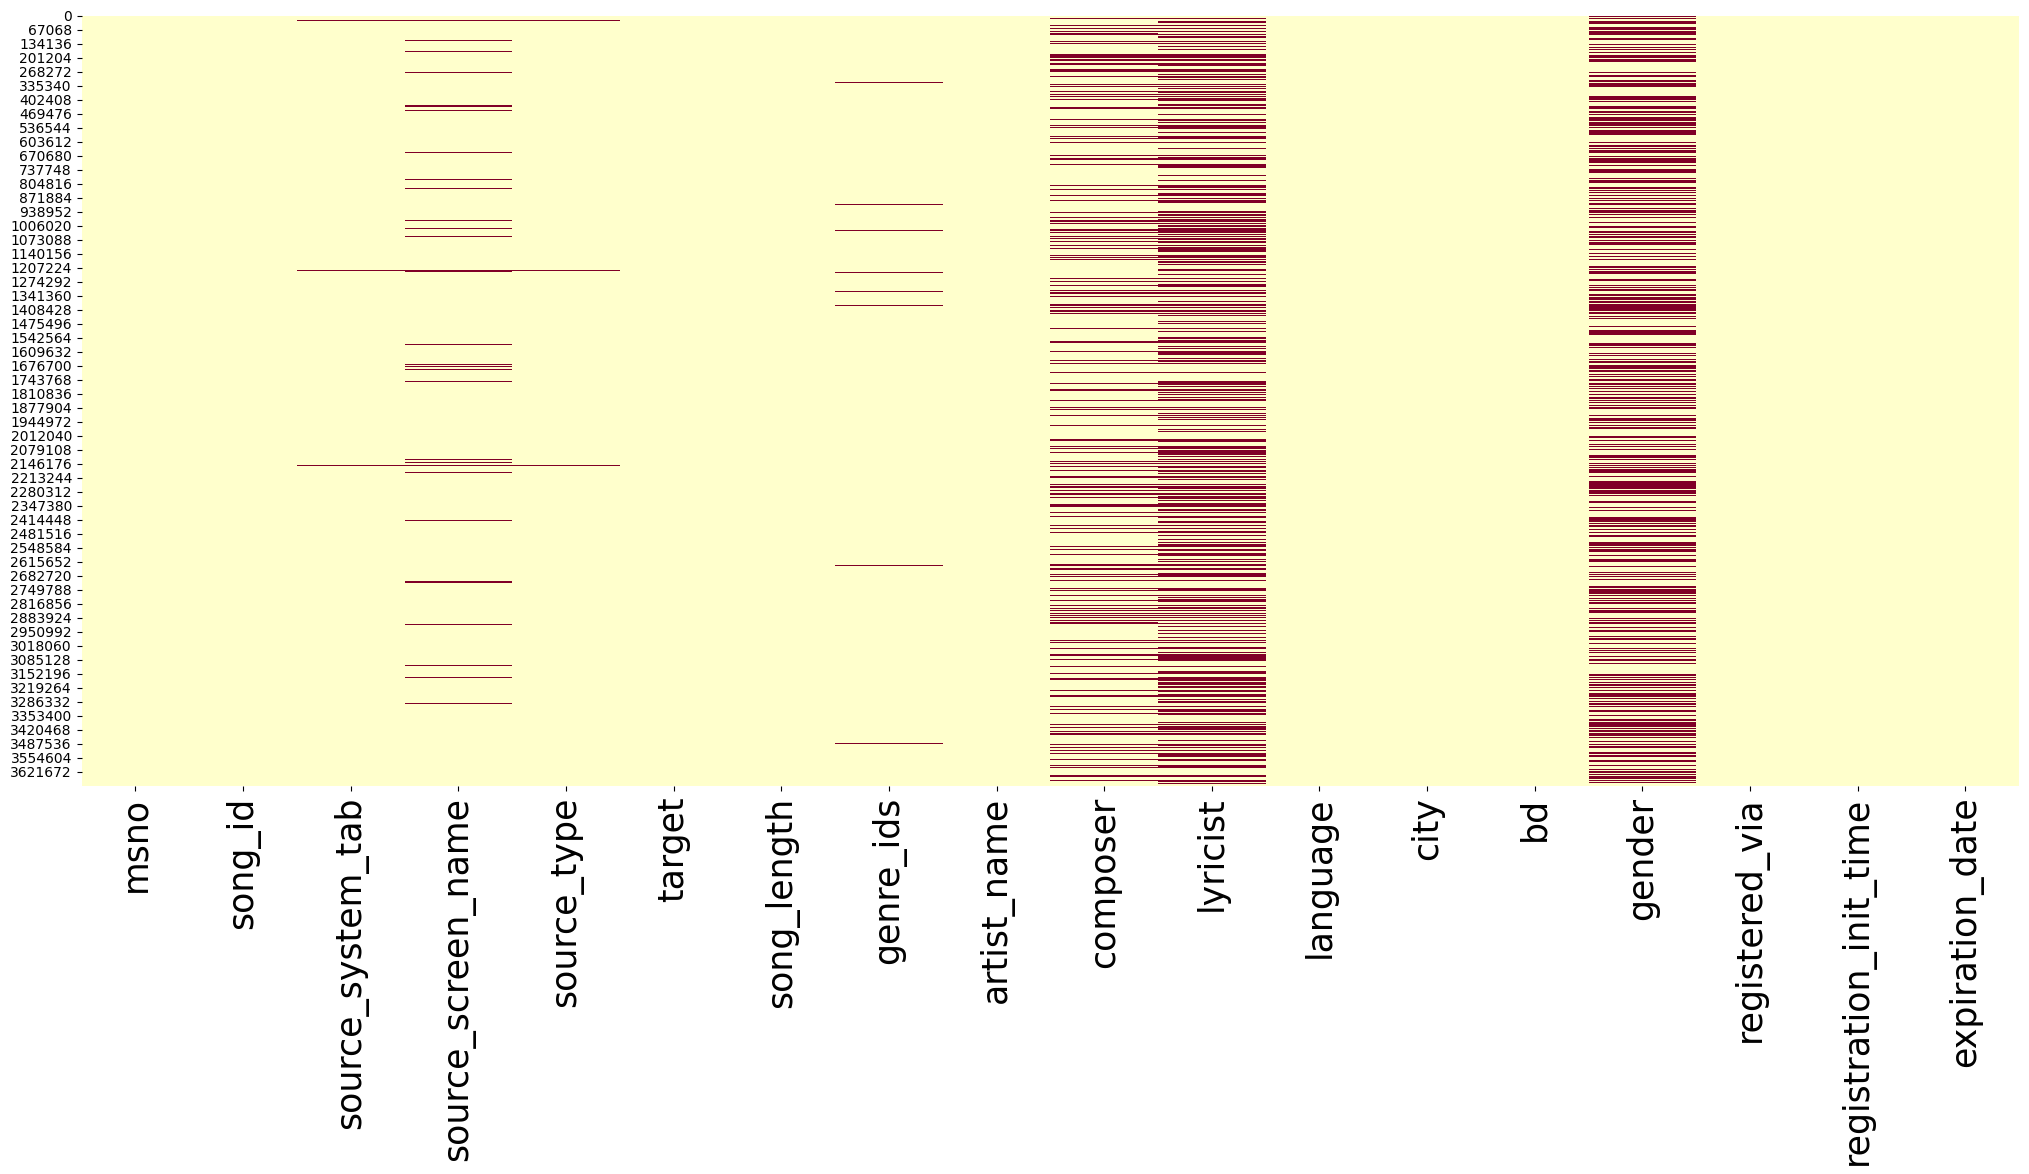

In [9]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(),cbar=False,cmap='YlOrRd')
plt.tick_params(axis='x', labelsize=25)

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")

for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [11]:
df.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [12]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

C:\Users\ayush\AppData\Local\Temp\ipykernel_10444\1548590259.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')
C:\Users\ayush\AppData\Local\Temp\ipykernel_10444\1548590259.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')


In [13]:
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [14]:
df.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,DqwB7smOAIbNnnQbWOpfsmy9znTwfDEQCW1I6ujFG48=,e/upMhPFcXl3Rxq0Us1abr0FcThlZOeqKJhBobmltBU=,my library,Local playlist more,local-playlist,1,233717.0,465,Ed Sheeran,Ed Sheeran| Steve Mac| Johnny McDaid| Kandi Bu...,...,female,9,2009-11-23,2017-09-10,2009,11,23,2017,9,10
1,hD1Xn3YlIZbYtBce9bVQUfTCg1uZgAE9WQ/Wz4RjOxs=,iGKawRb7dvdyKx0Ju0//HI9o5thMqkAnZq2ZerQ9Mzo=,radio,Radio,radio,0,472526.0,1609,Sandy Rivera,unknown,...,female,9,2016-08-04,2018-02-07,2016,8,4,2018,2,7
2,uU+E4hbQhwKeJ8Cp3LrC482QpogxSZIs19BGyxNB1RU=,00Pck9XAFjILmfm9dJK045V1ij0jB/BlPMPAg2uSTz4=,search,Search,song,0,259030.0,921|465,步步驚情電視原聲帶,謝廣太,...,female,3,2013-03-10,2017-09-26,2013,3,10,2017,9,26
3,OAEuKj+J1n1/fQjvZfgJSd3norSQm/Xyb2qcqjfg8Ho=,yPA+sQt5tJ3NgR6/L9BefmNpA2152zQQ+/Kvtt3iSUs=,my library,Local playlist more,local-playlist,0,286876.0,465,蔡依林 (Jolin Tsai),unknown,...,female,9,2009-03-20,2017-09-30,2009,3,20,2017,9,30
4,ALP8RATR99x8RhCaOtD+4MUvp1N1HDe1SeUKQwpKdIY=,Hum12fv82coQWytuQUP8K0cHEdJ9zz10RrGjsGqmDpw=,listen with,Others profile more,listen-with,1,239232.0,458,藍又時 (Shadya Lan),藍又時,...,unknown,7,2016-12-19,2017-09-18,2016,12,19,2017,9,18
5,/kiAobDcQv6FsZnhuNv5MHbBzK3ak2BwcyYRTxJgagc=,VqOqrfMxAOMwJpyfUSyWuPmHpMtSuzvrCvHgahApvDU=,my library,Local playlist more,local-library,0,189846.0,458,陳星翰 (Starr Chen),Starr Chen,...,female,9,2004-10-17,2017-09-30,2004,10,17,2017,9,30
6,nk+PhfPuSq89/OmdrxjGQdkbkBoa8JD5NG8Cw691+mo=,xBllAJyez7KkQufHnuaEJUsu/EXZzM9QQ1B8J1qzU4Y=,search,Artist more,top-hits-for-artist,1,235125.0,465,Savage Garden,unknown,...,male,9,2010-04-20,2017-09-25,2010,4,20,2017,9,25
7,xUct6hiM92b9w7EwnmiMwGCbLg5NuNHiUDz1QYxQNrU=,742rkfuVLdxg6kzPfWiq/d3dae0ODNAusyW/09qn1xY=,my library,unknown,top-hits-for-artist,0,251054.0,465,江蕙 (Jody Jiang),unknown,...,female,9,2011-09-04,2017-11-09,2011,9,4,2017,11,9
8,Lg4oiPXYBzNSWL9fLOfK8UHJe0DUkFsbD/QsVoP70RQ=,ih58jIWgit7qPy3VpvbM6E7AIvs57ylCHMVpIl1T+Io=,discover,Online playlist more,online-playlist,0,214726.0,465,Snakehips| MØ,Oliver Dickinson| James David| Joe Janiak| Neg...,...,male,3,2013-04-10,2017-09-01,2013,4,10,2017,9,1
9,6Cm2A0psQVGzAFoAbDk4FHbg/UaDTZGeQmIdSzDuECU=,G/4+VCRLpfjQJ4SAwMDcf+W8PTw0eOBRgFvg4fHUOO8=,my library,Local playlist more,local-library,0,298945.0,465,林芯儀 (Shennio Lin),朱國豪,...,male,3,2015-01-23,2018-02-05,2015,1,23,2018,2,5


In [15]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688709 entries, 0 to 3688708
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   msno                          int16  
 1   song_id                       int32  
 2   source_system_tab             int8   
 3   source_screen_name            int8   
 4   source_type                   int8   
 5   target                        int64  
 6   song_length                   float64
 7   genre_ids                     int16  
 8   artist_name                   int16  
 9   composer                      int32  
 10  lyricist                      int16  
 11  language                      float64
 12  city                          int64  
 13  bd                            int64  
 14  gender                        int8   
 15  registered_via                int64  
 16  registration_init_time        int16  
 17  expiration_date               int16  
 18  registration_init_time

In [18]:
df.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,...,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,1.504825e+04,1.293421e+05,2.440957e+00,9.083522e+00,4.765116e+00,5.029806e-01,2.450982e+05,3.021335e+02,2.180380e+04,4.184895e+04,...,1.114302e+00,6.794396e+00,2.546068e+03,9.471928e+02,2.012742e+03,6.832650e+00,1.581237e+01,2.017072e+03,8.341928e+00,1.562222e+01
std,8.683332e+03,7.485359e+04,1.890409e+00,4.593695e+00,2.468597e+00,4.999912e-01,6.739131e+04,8.870312e+01,9.992918e+03,1.648449e+04,...,8.218344e-01,2.275449e+00,9.643062e+02,1.121202e+02,3.019209e+00,3.699868e+00,8.769346e+00,3.989894e-01,2.510319e+00,9.105899e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00,1.000000e+00
25%,7.517000e+03,6.432000e+04,0.000000e+00,8.000000e+00,3.000000e+00,0.000000e+00,2.147260e+05,3.090000e+02,1.399600e+04,3.001100e+04,...,0.000000e+00,4.000000e+00,1.947000e+03,9.360000e+02,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00,8.000000e+00
50%,1.513600e+04,1.288690e+05,3.000000e+00,8.000000e+00,4.000000e+00,1.000000e+00,2.418120e+05,3.160000e+02,2.712900e+04,5.027700e+04,...,1.000000e+00,7.000000e+00,2.676000e+03,9.510000e+02,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00,1.500000e+01
75%,2.261100e+04,1.931120e+05,3.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,2.721600e+05,3.160000e+02,2.947900e+04,5.312900e+04,...,2.000000e+00,9.000000e+00,3.404000e+03,9.610000e+02,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01,2.300000e+01
max,3.001900e+04,2.594760e+05,8.000000e+00,2.000000e+01,1.200000e+01,1.000000e+00,1.085171e+07,5.200000e+02,3.229300e+04,5.954400e+04,...,2.000000e+00,1.300000e+01,3.807000e+03,1.365000e+03,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01,3.100000e+01


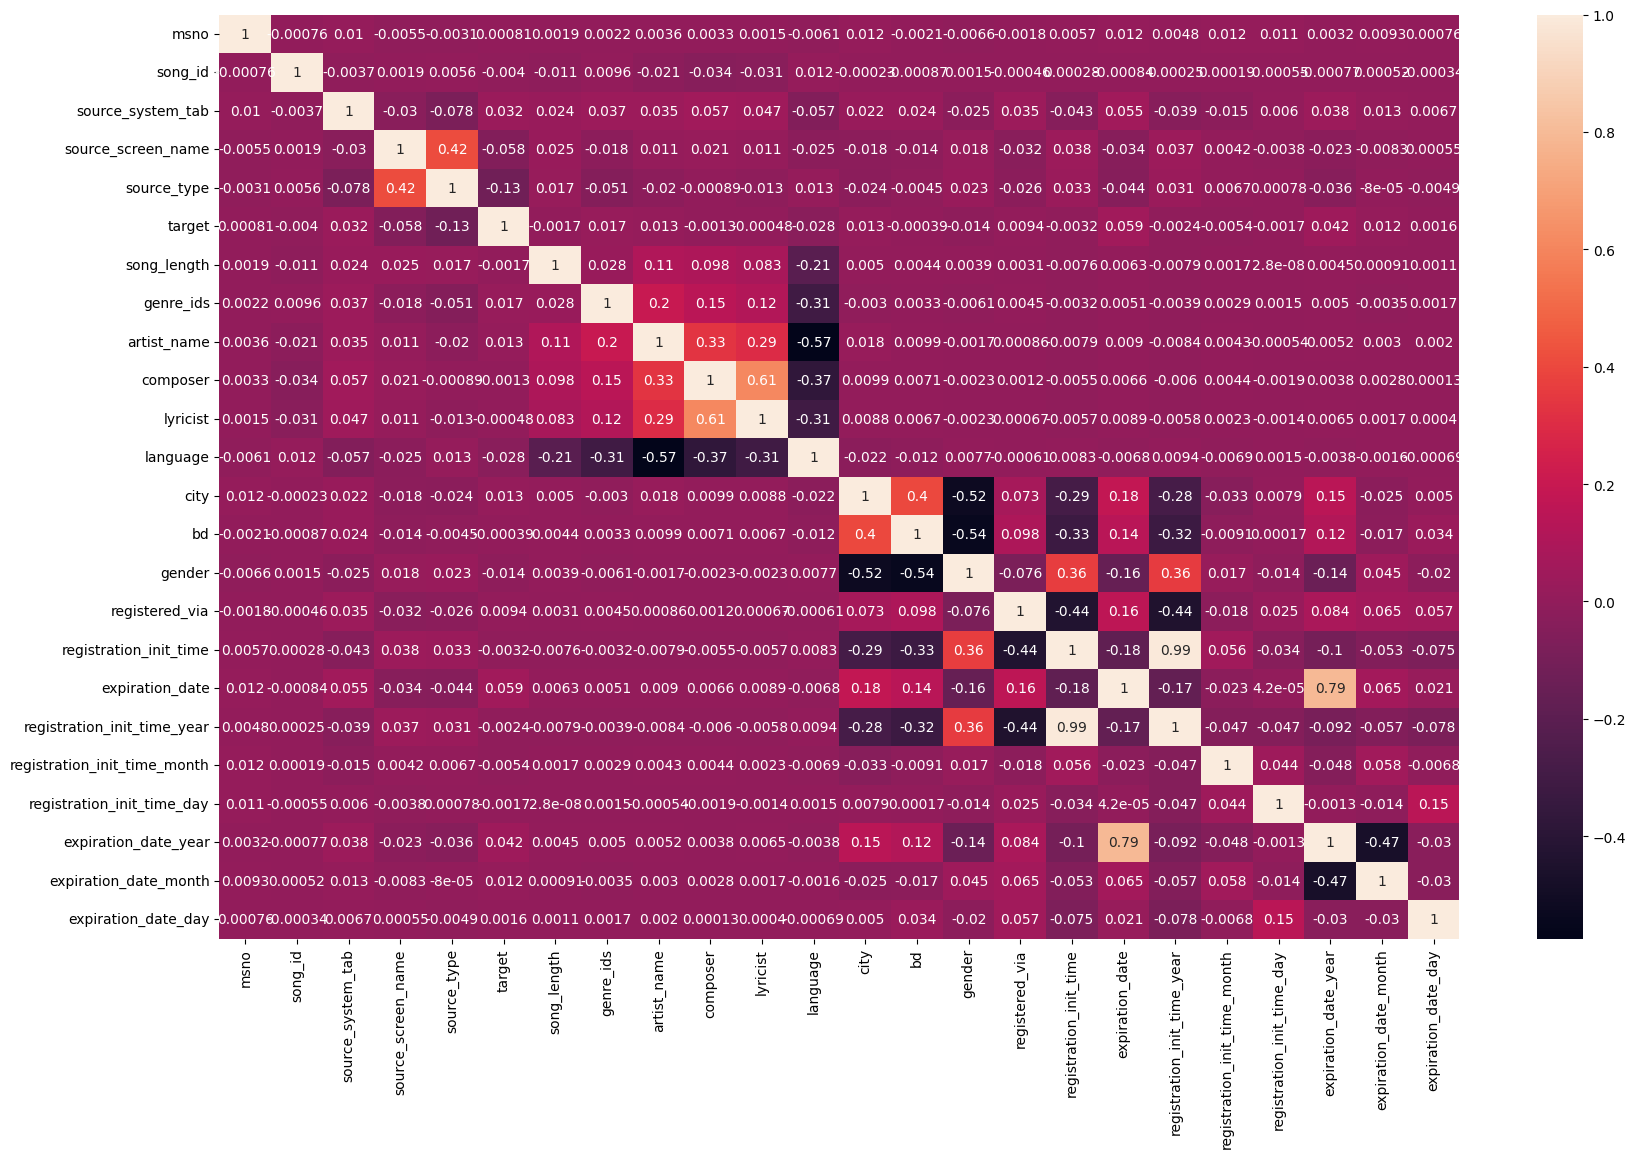

In [19]:
plt.figure(figsize=[20,12])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split( df , target, test_size = 0.2)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(2950967, 23)
(2950967,)
(737742, 23)
(737742,)


In [21]:
RF = RandomForestClassifier()
RF.fit(train_data, train_labels)

RF_TrainScore = RF.score(train_data, train_labels)
RF_TrainScore

0.9999952557924233

In [22]:
RF_TestScore = RF.score(test_data, test_labels)
RF_TestScore

0.7168440999699082

In [23]:
y_pred_rf =RF.predict(test_data)

<Axes: >

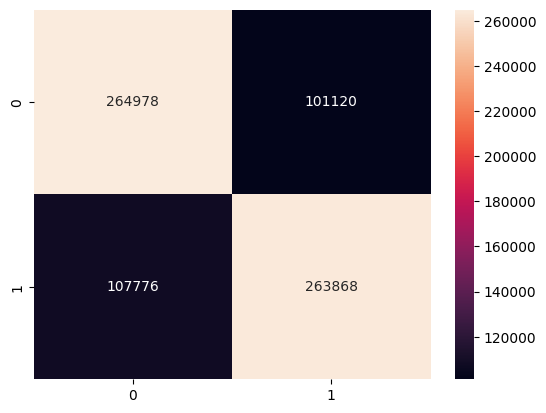

In [24]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(test_labels, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g')

In [25]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72    366098
           1       0.72      0.71      0.72    371644

    accuracy                           0.72    737742
   macro avg       0.72      0.72      0.72    737742
weighted avg       0.72      0.72      0.72    737742



In [26]:
df_plot = pd.DataFrame({'features': df.columns,
                        'importances': RF.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

C:\Users\ayush\AppData\Local\Temp\ipykernel_10444\1266950157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_plot.importances, y = df_plot.features, palette='viridis')


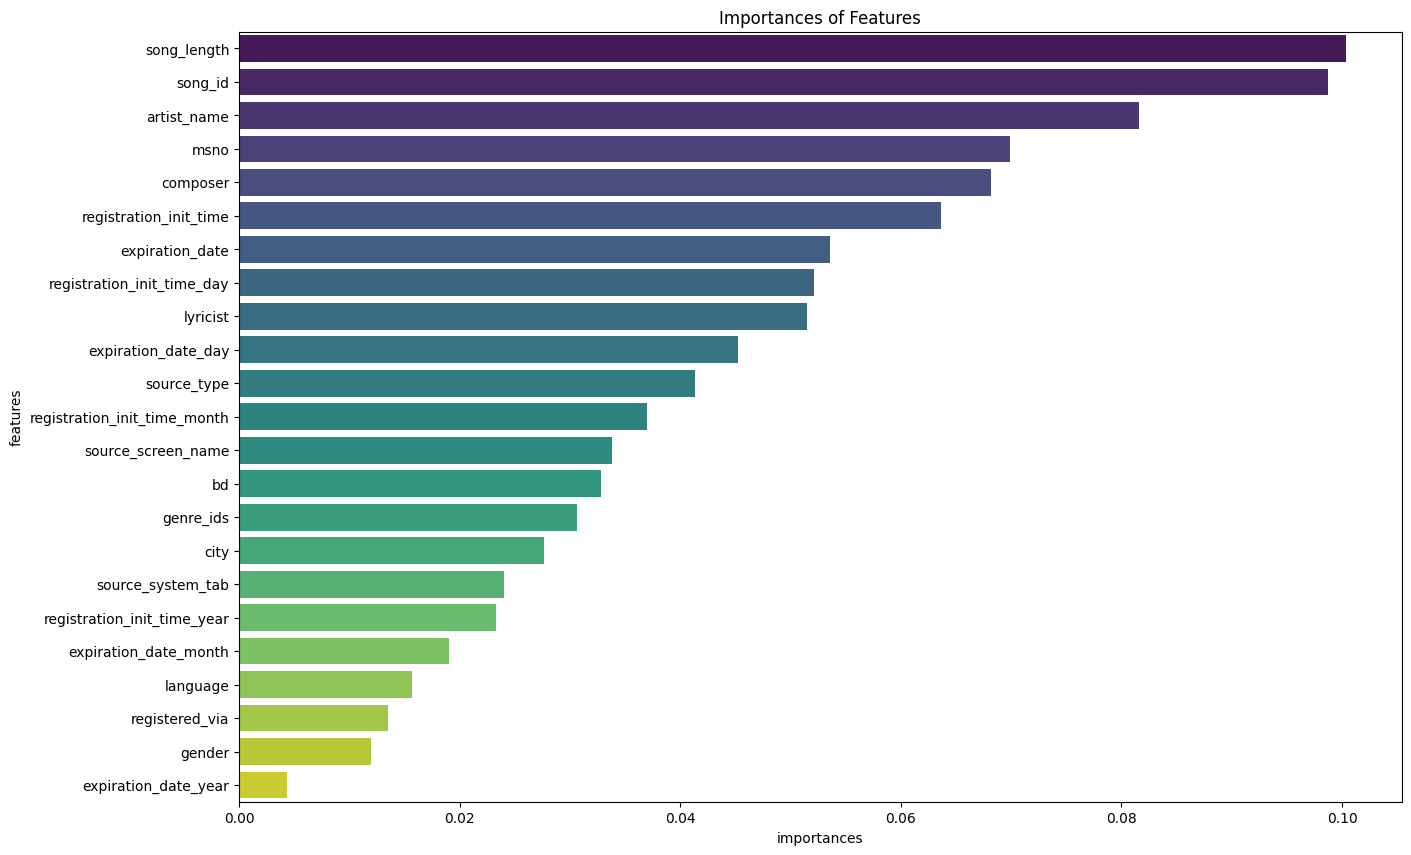

In [28]:
plt.figure(figsize=[15,10])
sns.barplot(x = df_plot.importances, y = df_plot.features, palette='viridis')
plt.title('Importances of Features')
plt.show()

In [30]:
df = df.drop(columns=df_plot.features[df_plot.importances < 0.04].tolist())

In [31]:
print(df.shape)
df.columns

(3688709, 11)


Index(['msno', 'song_id', 'source_type', 'song_length', 'artist_name',
       'composer', 'lyricist', 'registration_init_time', 'expiration_date',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

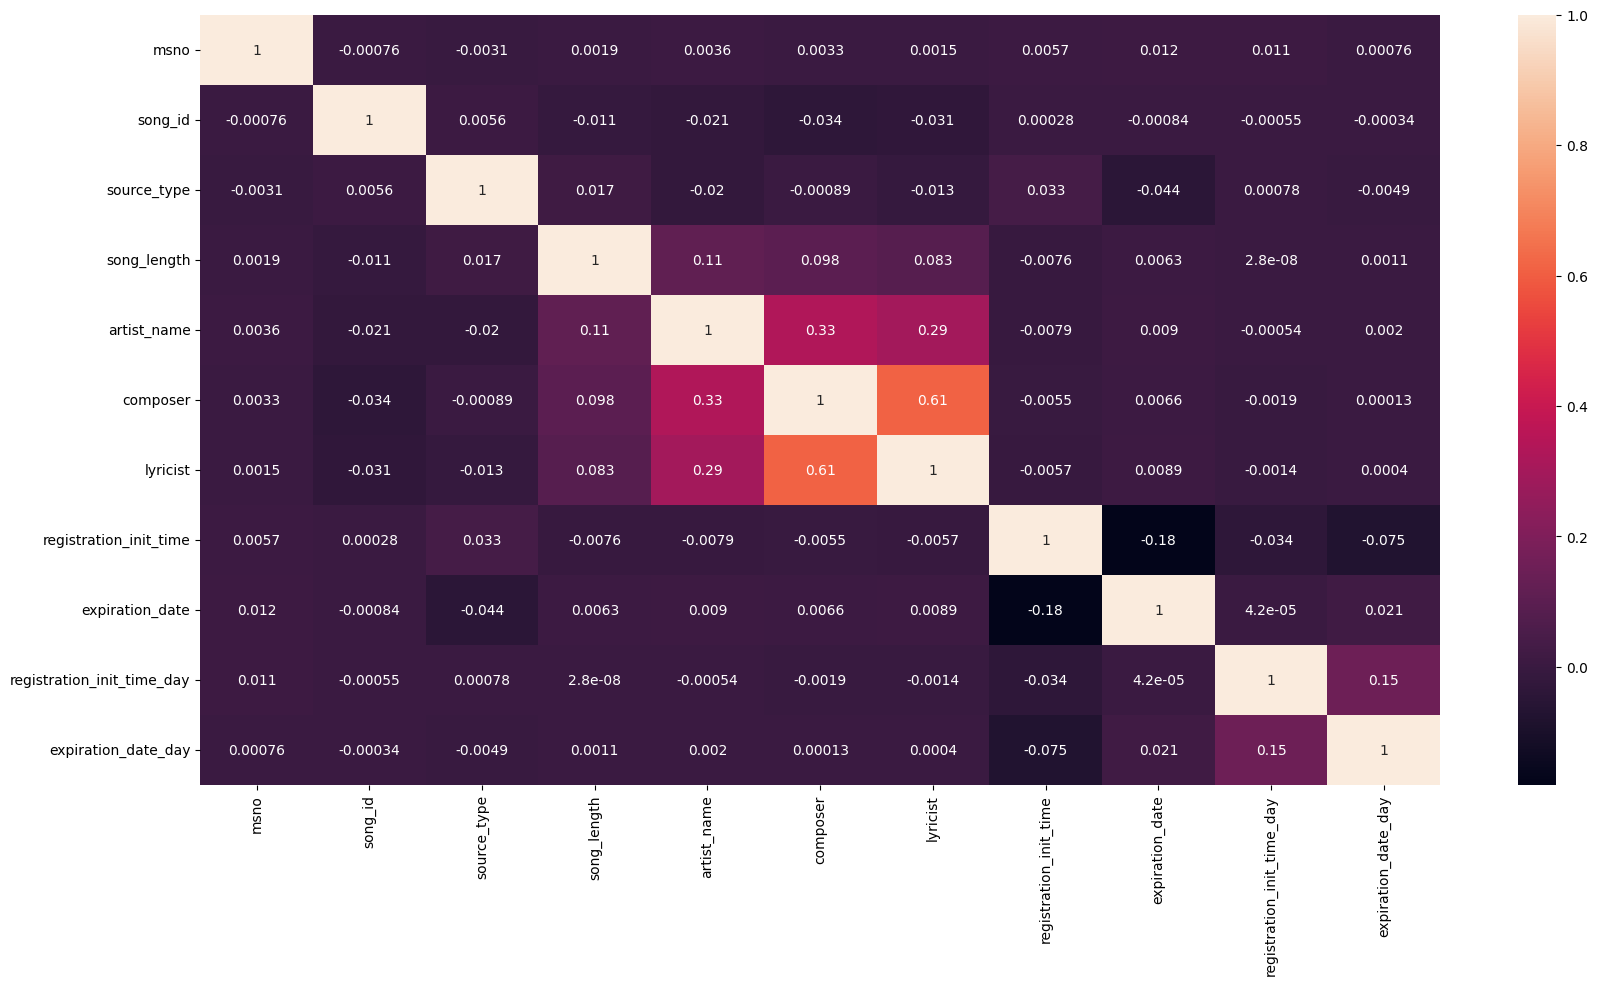

In [32]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
import xgboost as xgb

In [35]:
XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5)
XGB.fit(train_data, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
XGB_TrainScore = XGB.score(train_data, train_labels)
XGB_TrainScore

0.7765806937183641

In [37]:
XGB_TestScore = XGB.score(test_data, test_labels)

XGB_TestScore

0.7160904489645432

In [38]:
y_pred_xgb =XGB.predict(test_data)

<Axes: >

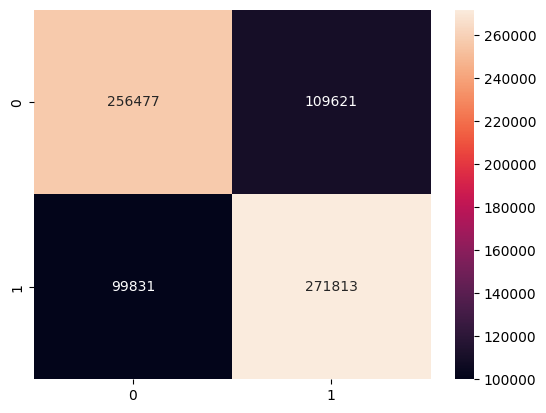

In [39]:
cm_lgbm = confusion_matrix(test_labels, y_pred_xgb)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [40]:
print(classification_report(test_labels, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71    366098
           1       0.71      0.73      0.72    371644

    accuracy                           0.72    737742
   macro avg       0.72      0.72      0.72    737742
weighted avg       0.72      0.72      0.72    737742



In [41]:
import lightgbm as lgb

d_train = lgb.Dataset(train_data, label=train_labels)

In [42]:
params = {
        'objective': 'binary',
        'boosting': 'dart',
        'learning_rate': 0.2 ,
        'verbose': 0,
        'num_leaves': 100,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 100,
        'metric' : 'auc'
    }

In [43]:
clf = lgb.train(params, d_train, 100)

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [44]:
y_predtrain_lgbm=clf.predict(train_data)

y_predtest_lgbm=clf.predict(test_data)

In [45]:
# Making Prediction for training and test sets
for i in range(0, train_data.shape[0]):
    if y_predtrain_lgbm[i]>=.5: 
        y_predtrain_lgbm[i]=1
    else:  
        y_predtrain_lgbm[i]=0
        
for i in range(0, test_data.shape[0]):
    if y_predtest_lgbm[i]>=.5: 
        y_predtest_lgbm[i]=1
    else:  
        y_predtest_lgbm[i]=0 

In [46]:
from sklearn.metrics import accuracy_score


LGBM_TrainScore = accuracy_score(y_predtrain_lgbm,train_labels)
LGBM_TestScore = accuracy_score(y_predtest_lgbm,test_labels)
#Print accuracy
print ("Test Accuracy with LGBM = ", LGBM_TrainScore)
print ("Test Accuracy with LGBM = ", LGBM_TestScore)

Test Accuracy with LGBM =  0.6548565266910813
Test Accuracy with LGBM =  0.6538545995754613


<Axes: >

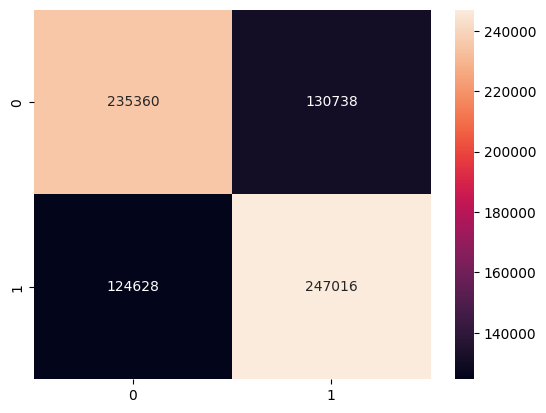

In [47]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

cm_lgbm = confusion_matrix(test_labels, y_predtest_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [48]:
print(classification_report(test_labels, y_predtest_lgbm))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65    366098
           1       0.65      0.66      0.66    371644

    accuracy                           0.65    737742
   macro avg       0.65      0.65      0.65    737742
weighted avg       0.65      0.65      0.65    737742



In [49]:
from catboost import CatBoostClassifier

In [50]:
CatBoost = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=300)
CatBoost.fit(train_data, train_labels)


CatBoost_TrainScore = CatBoost.score(train_data, train_labels)

0:	learn: 0.6850755	total: 352ms	remaining: 1m 45s
1:	learn: 0.6784665	total: 653ms	remaining: 1m 37s
2:	learn: 0.6730935	total: 912ms	remaining: 1m 30s
3:	learn: 0.6686551	total: 1.17s	remaining: 1m 26s
4:	learn: 0.6650381	total: 1.43s	remaining: 1m 24s
5:	learn: 0.6620966	total: 1.69s	remaining: 1m 22s
6:	learn: 0.6595721	total: 1.95s	remaining: 1m 21s
7:	learn: 0.6576055	total: 2.19s	remaining: 1m 20s
8:	learn: 0.6559282	total: 2.46s	remaining: 1m 19s
9:	learn: 0.6544912	total: 2.73s	remaining: 1m 19s
10:	learn: 0.6533064	total: 2.99s	remaining: 1m 18s
11:	learn: 0.6522373	total: 3.26s	remaining: 1m 18s
12:	learn: 0.6513145	total: 3.56s	remaining: 1m 18s
13:	learn: 0.6505915	total: 3.83s	remaining: 1m 18s
14:	learn: 0.6498887	total: 4.1s	remaining: 1m 17s
15:	learn: 0.6492156	total: 4.38s	remaining: 1m 17s
16:	learn: 0.6487763	total: 4.63s	remaining: 1m 17s
17:	learn: 0.6483241	total: 4.9s	remaining: 1m 16s
18:	learn: 0.6478554	total: 5.16s	remaining: 1m 16s
19:	learn: 0.6473141	tot

In [51]:
CatBoost_TrainScore

0.6688953146544845

In [52]:
CatBoost_TestScore = CatBoost.score(test_data, test_labels)
CatBoost_TestScore

0.6648299812129443

In [53]:
# Predicting
y_pred_catboost = CatBoost.predict(test_data)

<Axes: >

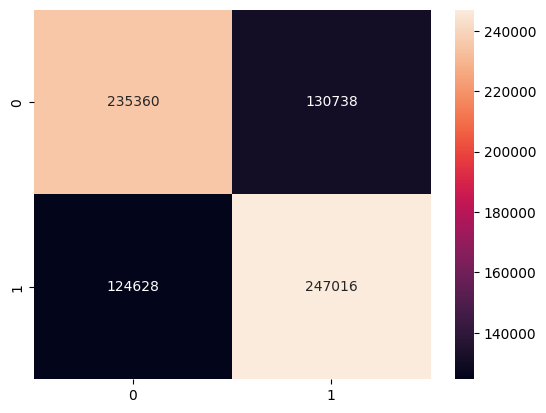

In [54]:
cm_catboost = confusion_matrix(test_labels, y_pred_catboost)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [55]:
print(classification_report(test_labels, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65    366098
           1       0.66      0.69      0.67    371644

    accuracy                           0.66    737742
   macro avg       0.67      0.66      0.66    737742
weighted avg       0.67      0.66      0.66    737742



In [56]:
results = pd.DataFrame( [["Random Forest", RF_TrainScore, RF_TestScore ],
                       ["XGBoost", XGB_TrainScore ,XGB_TestScore ],
                        ["Light LGBM", LGBM_TrainScore ,LGBM_TestScore ],
                        ["CatBoost", CatBoost_TrainScore ,CatBoost_TestScore ]],
                       columns = ["Model","Training Accuracy %","Test Evaluation %"]).sort_values(by="Test Evaluation %",ascending=False)
results.style.background_gradient(cmap='BuPu')

,Model,Training Accuracy %,Test Evaluation %
0,Random Forest,0.999995,0.716844
1,XGBoost,0.776581,0.716090
3,CatBoost,0.668895,0.664830
2,Light LGBM,0.654857,0.653855
